<a href="https://colab.research.google.com/github/jeev-data-wiz/Stock-Prices/blob/main/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving BAJFINANCE.csv to BAJFINANCE.csv


In [3]:
df = pd.read_csv('BAJFINANCE.csv')

In [4]:
df.head(8)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
5,2000-01-10,BAJAUTOFIN,EQ,42.90,42.05,44.90,41.0,43.00,42.90,42.47,4700,1.996100e+10,NaN,NaN,NaN
6,2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.5,40.25,40.10,40.25,5500,2.213900e+10,NaN,NaN,NaN
7,2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.0,39.00,39.00,39.80,1000,3.980000e+09,NaN,NaN,NaN


In [5]:
df.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

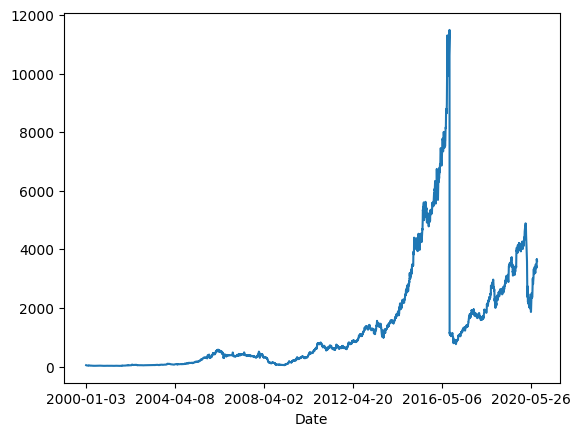

In [6]:
df['VWAP'].plot()

In [7]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [8]:
df.shape

(5070, 14)

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [11]:
lag_features=['High','Low','Volume','Turnover','Trades']
w1=3
w2=7

In [12]:
for feature in lag_features :
  df[feature+"rolling_mean3"]=df[feature].rolling(window=w1).mean()
  df[feature+"rolling_mean7"]=df[feature].rolling(window=w2).mean()

In [13]:
for feature in lag_features :
  df[feature+"rolling_std3"]=df[feature].rolling(window=w1).std()
  df[feature+"rolling_std7"]=df[feature].rolling(window=w2).std()

In [14]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std3,Highrolling_std7,Lowrolling_std3,Lowrolling_std7,Volumerolling_std3,Volumerolling_std7,Turnoverrolling_std3,Turnoverrolling_std7,Tradesrolling_std3,Tradesrolling_std7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [15]:
df.shape

(2291, 34)

In [16]:
df.dropna(inplace=True)

In [17]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7'],
      dtype='object')

In [18]:
ind_features=['Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7']

In [19]:
training_data=df[0:1800]
test_data=df[1800:]

The task aims to use Auto Arima model to conduct the time series analysis of the stock prices. ARIMA is an abbrevation of AR + I + MA. This can be expanded as Auto regression, Integration and Moving average.

The ARIMA model requires three parameters (p,d,q). The q parameter is obtained from the ACF(Auto correalation facor plot). The first index which falls within 0.1 is considered as q. ACF values are good if <0.1 .

**p value**
The parameter p is obtained from the PACF (Partial auto correlation factor) plot. The first index that falls within 0.1 is taken as the p value.

**d value**
The value of d is obtained at the order when the difference becomes stationality.

The **Auto ARIMA** model aims to do the same without our interefernce

In [20]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [21]:
from pmdarima import auto_arima

In [51]:
model=auto_arima(y=training_data['VWAP'],x=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.401 seconds


In [52]:
model.fit(training_data['VWAP'],exogenous=training_data[ind_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [53]:
forecast=model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [54]:
test_data['Forecast_ARIMA']=forecast

<ipython-input-54-5aacccf561f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast_ARIMA']=forecast


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Date'>

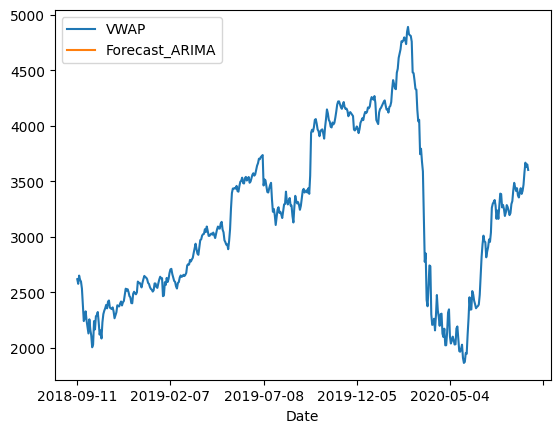

In [55]:
test_data[['VWAP','Forecast_ARIMA']].plot()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

In [ ]:
mean_absolute_error(test_data['VMAP'],test_data['Forecast_ARIMA'])